In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
##Reading the dataset
os.chdir("/Users/ishitajain/Documents/Machine_learning_and_coding/codes/dna_classification/")
chimapnzee_dna_sequences = pd.read_table("chimpanzee.txt")
human_dna_sequences = pd.read_table("human.txt")
dog_dna_sequences = pd.read_table("dog.txt")

[4 6 0 1 3 2 5]
[4 3 5 2 6 0 1]
[4 6 0 3 2 5 1]
class
6    30.662100
4    16.232877
3    15.342466
1    12.191781
0    12.123288
2     7.968037
5     5.479452
Name: count, dtype: float64
class
6    30.975030
4    15.517241
0    13.912010
3    13.555291
1    10.998811
2     8.561237
5     6.480380
Name: count, dtype: float64
class
6    31.707317
4    16.463415
0    15.975610
3    11.585366
1     9.146341
2     7.804878
5     7.317073
Name: count, dtype: float64


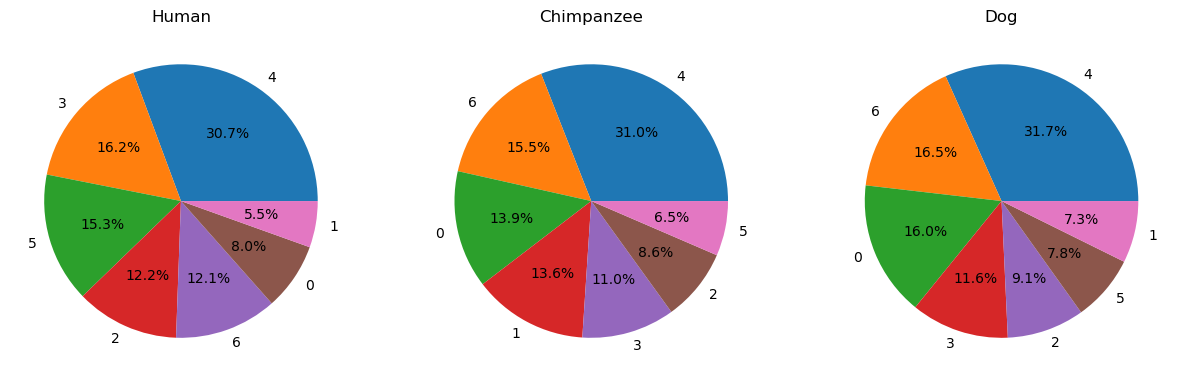

In [4]:
##class_representation analysis for each dataset
chimp_class_labels = chimapnzee_dna_sequences['class'].unique()
print(chimp_class_labels)
human_class_labels = human_dna_sequences['class'].unique()
print(human_class_labels)
dog_class_labels = dog_dna_sequences['class'].unique()
print(dog_class_labels)

human_values = human_dna_sequences['class'].value_counts() ## the values is a type of pandas series the panda series is basically a column vector 
human_values_percenatges = human_values/sum(human_values) * 100
print(human_values_percenatges)
chimp_values = chimapnzee_dna_sequences['class'].value_counts()
chimp_value_percentages = chimp_values/chimp_values.sum() * 100
print(chimp_value_percentages)
dog_values = dog_dna_sequences['class'].value_counts()
dog_value_percentages = dog_values/dog_values.sum() * 100
print(dog_value_percentages)


fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].pie(human_values_percenatges, labels = human_class_labels, autopct = "%1.1f%%")
axes[1].pie(chimp_value_percentages, labels = chimp_class_labels, autopct = "%1.1f%%")
axes[2].pie(dog_value_percentages, labels = dog_class_labels, autopct= "%1.1f%%")

axes[0].set_title("Human")
axes[1].set_title("Chimpanzee")
axes[2].set_title("Dog")
plt.show()

In [5]:
seq = human_dna_sequences['sequence'].tolist()
kmer_counts={}

for sequence in seq:
    kmers = [sequence[i:i+6] for i in range(0,len(sequence)-5,1)]
    for kmer in kmers:
        if kmer in kmer_counts:
            kmer_counts[kmer]+=1
        else:
            kmer_counts[kmer]=1       
sorted_kmers = sorted(kmer_counts.items(), key = lambda x: x[1], reverse=True)
top_10_kmers = sorted_kmers[:10]
top_10_kmer_percentages = [kmer[1] / sum(kmer_counts.values()) *100 for kmer in top_10_kmers]

for i in range(len(top_10_kmers)):
    print(f'{top_10_kmers[i][0]} : {top_10_kmer_percentages[i]:.1f}%')


CAGCAG : 0.1%
CTGCTG : 0.1%
AGAAGA : 0.1%
CTGGAG : 0.1%
GAAGAA : 0.1%
CTGCAG : 0.1%
GAGGAG : 0.1%
AAGAAG : 0.1%
CCTGGA : 0.1%
GGAGGA : 0.1%


In [6]:
def get_overlapping_kmers(seq:str, k:int):
    return [] if k<1 else[seq[i:i+k].lower() for i in range(len(seq)-k+1)]


In [7]:
human_dna_sequences['words'] = list(map(lambda x: get_overlapping_kmers(x ,6), human_dna_sequences['sequence']))
chimapnzee_dna_sequences['words'] = list(map(lambda x: get_overlapping_kmers(x ,6), chimapnzee_dna_sequences['sequence']))
dog_dna_sequences['words'] = list(map(lambda x: get_overlapping_kmers(x ,6), dog_dna_sequences['sequence']))

In [8]:
human_dna_seq = human_dna_sequences.drop('sequence', axis = 1)
chimp_dna_seq = chimapnzee_dna_sequences.drop('sequence', axis = 1)
dog_dna_seq = dog_dna_sequences.drop('sequence', axis = 1)

In [38]:
human_texts = list(human_dna_seq['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

y_human_data = human_dna_seq['class'].values

In [39]:
human_texts[:10]

['atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaa

In [40]:
chimp_texts = list(chimp_dna_seq['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])

y_chimp_data = chimp_dna_seq['class'].values

In [41]:
dog_texts = list(dog_dna_seq['words'])
for items in range(len(dog_texts)):
    dog_texts[items] = ' '.join(dog_texts[items])
y_dog_data = dog_dna_seq['words'].values

In [42]:
cv = CountVectorizer(ngram_range=(4,4))
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.fit_transform(chimp_texts)
X_dog = cv.fit_transform(dog_texts)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_human_data, test_size = 0.20, random_state=32)

In [44]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [45]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
clf = GridSearchCV(model, param, cv=10)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
clf.best_params_

###1 was the best param out there 

{'alpha': 1}

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(prediction, y_test))
confusion_matrix = confusion_matrix(prediction, y_test)


0.9703196347031964


In [47]:
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(prediction, name='Predicted'))) 

Predicted    0    1   2    3    4   5    6
Actual                                    
0          116    0   0    0    0   0    0
1            0  111   1    0    0   0    1
2            2    0  66    0    0   0    1
3            0    0   0  129    1   0    0
4            3    0   0    0  137   1    4
5            2    0   0    0    2  45    0
6            1    0   0    3    2   2  246


In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [51]:
print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_train_pred, y_train))

0.932648401826484
0.9997146118721462


In [52]:
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))) 

Predicted    0    1   2    3    4   5    6
Actual                                    
0          112    0   0    3    0   0    1
1            2  103   0    3    0   0    5
2            2    0  60    3    0   0    4
3            2    0   0  126    0   0    2
4            2    0   0    1  135   0    7
5            2    0   0    6    1  36    4
6            4    0   0    5    0   0  245
